# Beam Search and BLEU score

## Beam Search
* Seq2Seq 과 같은 자연어 생성 모델에서 test time에서 보다 더 좋은 품질의 생성 결과를 얻을 수 있도록 하는 기법

### Greedy decoding
* test time에서 바로 다음 단어를 생성할 때, 해당 timestep에서 가장 높은 확률을 가지는 단어 하나를 택하여 decoding 함
* sequence 전체적으로 확률을 보는 것이 아닌, 현재 timestep에서 가장 좋아보이는 단어를 선택함
* 단어를 잘못 선택하는 경우 뒤로 돌아갈 수 없기 때문에 최적의 예측값을 내어주지 못하는 문제가 발생함


### Exhaustive search
* joint probability(동시사건에 대한 확률분포)
  * 확률값을 최대가 되도록 하는 답을 찾음
  $$ \begin{matrix} P(y \mid x) &=& P(y_1 \mid x)P(y_2 \mid y_1, x)P(y_3 \mid y_2, y_1, x) \cdots P(y_T \mid y_1, \cdots, y_{T-1}, x) \\ &=& \prod_1^T{P(y_t \mid y_1, \cdots, y_{t-1}, x)} \end{matrix}$$
  * $x$ : input sentence
  * $y$ : output sentence
  * $P(y_1 \mid x)$이 최대값이 아니더라도 뒤에서 더 큰 확률값을 가질 수 있도록 하는 방법 도 있음. 꼭 $P(y_1 \mid x)$가 최대일 필요는 없음
* timestep $t$까지의 모든 가능한 경우의 수를 고려하면 매 timestep마다 고를 수 있는 단어의 수가 vocabulary의 크기가 됨
  * $t$ : timestep, $V$ : size of vocabulary
    => 가능한 경우의 수 : $V^t$
  * 기하급수적으로 늘어나는 경우의 수를 계산하기 위해서 많은 시간과 계산량이 필요함($O(V^t)$)

### Beam search
* Greedy decoding과 Exhaustive search의 사이에 있는 approch
* decoder의 매 timestep마다 정해놓은 $k$개의 가짓수를 고려하고, 최종적으로 나온 $k$개의 candidate 중에서 가장 확률이 높을 것을 선택하는 방식
  * hypothesis : $k$개의 decoding output
  * $k$ : beam size(일반적으로 5~10개로 설정함)
  * $P_{LM}(y_1, \cdots, y_t \mid x)$ : 최대화하고자 하는 값
    * $\log$를 사용하여 덧셈으로 바꿈
    * 확률은 0 ~ 1 사이의 값을 가지지만 $\log$를 취해주었기 때문에 음수 값을 가짐

$$score(y_1, \cdots, y_t) = \log{P_{LM}(y_1, \cdots, y_t \mid x)} = \sum_{i=1}^t{\log{P_{LM}(y_i \mid y_1, \cdots, y_{i-1}, x)}}$$
* 가장 높은 $k$개의 candidate을 고려하고, 추적함
  * 모든 경우의 수를 다 따진 것 보다는 효율적으로 계산할 수 있음

### Beam search: Example
* beam size : $k = 2$

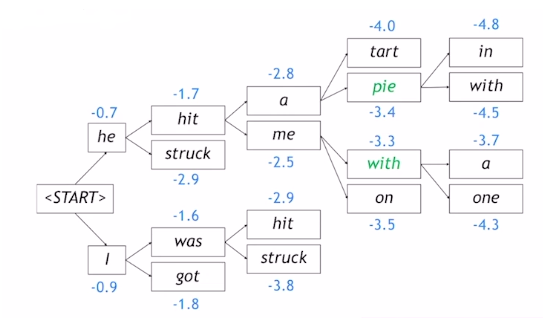

### Beam search : Stoppinc criterion
* 서로 다른 경로(hypotheses)가 존재하고, 서로 다른 시점(timestep)에서 <END> token을 생성함
* hypotheses를 $k$개 만큼 관리/추적해가며 decoding 과정을 진행하다가 <END> token을 생성한 hypothesis는 생성과정을 멈추고(완료) 저장 공간(임시 메모리 공간)에 임시로 저장함
* 중단 시점
  * 미리 지정한 timestep $T$까지 decoding 과정을 진행한 후 중단
  * 임시 메모리 공간에 저장된 <END> token의 개수(완료된 hypotheses의 수)가 미리 지정한 hypotheses의 개수 $n$일 경우 중단

### Beam search : Finishing up
* beam search가 완료되면 completed hypotheses의 list를 얻고, 이 중에 가장 높은 score를 가지는 하나를 뽑아야 함
* joint probability
  $$score(y_1, \cdots, y_t) = \log{P_{LM}(y_1, \cdots, y_t \mid x)} = \sum_{i=1}^t{\log{P_{LM}(y_i \mid y_1, \cdots, y_{i-1}, x)}}$$
  * sequence 길이가 짧으면 joint probability 가 상대적으로 높게 나오고, sequence 길이가 길면 joint probability가 상대적으로 낮게 나옴
    * 단어가 생성될 수록 $-$값의 더해주기 때문
  * 문제를 해결하기 위해 hypothesis별로 word당 평균 확률값(joint probability 를 hypothesis가 가지는 단어의 개수로 나눠줌)을 score로 부여함(길이에 영향받지 않게 만들기 위함)

## BLEU score
* 자연어 생성 모델에서 품질, 결과의 정확도를 평가하는 척도

### Precision and Recall
* Precision : 정밀도, 정답에 해당하는 sequence(ground truth sequence)와 예측한 sequence를 비교하여 예측한 sequence에 대하여 ground truth문장과 일치하는 단어의 개수를 확률로 나타냄(생성된 단어 중 일치하는 개수를 구함)
  * 예측된 결과에 대해 실질적으로 느끼는 정확도
  $$precision = {{\#(correct words)} \over {length\_of\_prediction}}$$
  * $length\_of\_prediction$ : sequence의 단어 개수
* Recall : 재현율, ground truth sequence 중에 예측한 sequence 의 단어와 일치하는 단어의 개수를 확률로 나타냄(ground truth 단어 중 생성된 단어와 일치하는 개수를 구함)
  * 노출을 원하는 정보 중에 얼마나 노출했는지를 알려줌
  $$recall = {{\#(correct words)} \over {length\_of\_reference}}$$
    * $length\_of\_reference$ : ground truth sequence의 단어 개수

* Precision과 Recall의 조화평균
  * 두 값중 작은 값에 좀더 치중한 평균
  $$F - measure = {{precision \times recall} \over {{1 \over 2}(precision + recall)}}$$



* model2를 보면 precision, Recall, 그리고 F-measure가 모두 100% 이지만 단어 순서가 맞지 않아 문법적으로 말이 되지 않는 문장이 됨

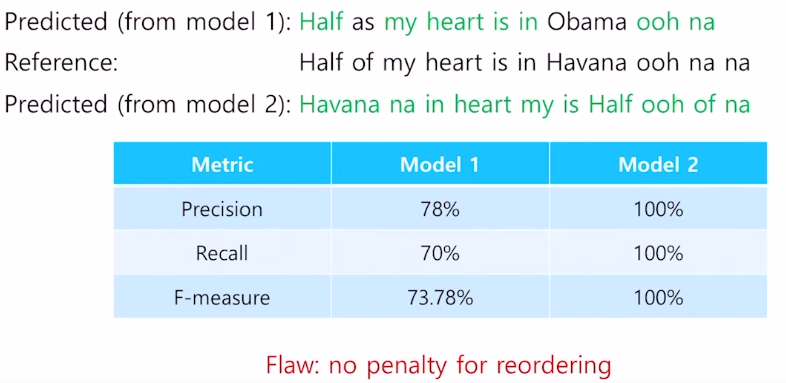

### BLEU score
* BiLingual Evaluation Understudy
* N-gram overlap : phrase(특정 개수(N)의 연속된 단어)가 ground truth와 얼마나 일치하는지를 구해서 최종 평가에 반영함
* 기계번역에서 제안된 성능 평가
* Precision, Recall, F-measure의 이슈를 보완함
* 번역에서 precision만 고려함(recall은 무시함)
* recall을 무시하는 이유
  * 특정 단어(부사)가 없어도 문장에 지장이 없는 경우가 존재함
  * source 문장에 없는 단어가 예측된 경우 오역으로 판단될 수 있음

  $$BLEU = \min{(1, {{length\_of\_prediction} \over {length\_of\_reference}})}(\prod_{i=1}^4{precision_i})^{1 \over 4}$$
  * $\min{(1, {{length\_of\_prediction} \over {length\_of\_reference}})}$ : brevity penalty
    * 예측 sentence가 짧으면 짧아진 만큼 precision값을 낮춰줌
    * recall의 최대값을 의미함
  * precision에 대해 기하 평균을 적용함 : 작은 값에 더 많은 가중치를 부여함

* example
  * model2 : 모든 단어가 있어도 phrase가 일치하지 않아 BLEU score가 0이 됨

  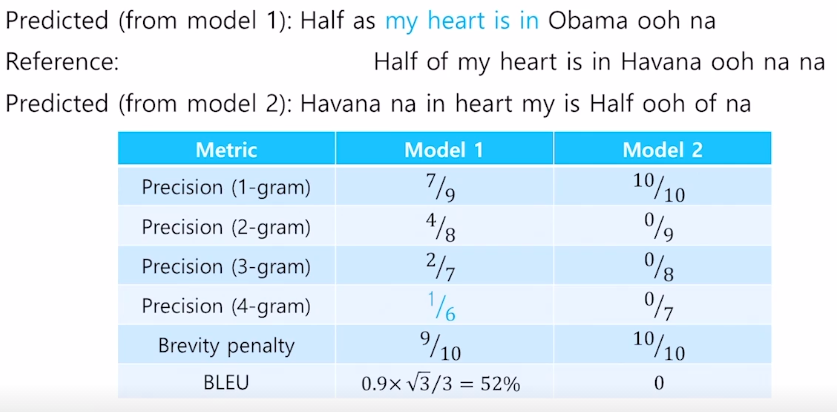